<a href="https://colab.research.google.com/github/Shubhu123k12/BUILD-A-MACHINE-LEARNING-MODEL-TO-PREDICT-OUTCOMES-BASED-ON-A-DATASET./blob/main/Internship%20Task-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv('/content/Bikes_DATASET.csv')

In [2]:
df.head()

,BIKE_NAME,PRICE,CITY,KMS_DRIVEN,OWNER,AGE,POWER,BRAND
0,TVS Star City Plus Dual Tone 110cc,35000,Ahmedabad,17654,First Owner,3,110,TVS
1,Royal Enfield Classic 350cc,119900,Delhi,11000,First Owner,4,350,Royal Enfield
2,Triumph Daytona 675R,600000,Delhi,110,First Owner,8,675,Triumph
3,TVS Apache RTR 180cc,65000,Bangalore,16329,First Owner,4,180,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000,Bangalore,10000,First Owner,3,150,Yamaha


In [6]:
df.describe()

,PRICE,KMS_DRIVEN,AGE,POWER
count,3.264800e+04,32648.000000,32648.000000,32648.000000
mean,6.829542e+04,26344.625184,8.048211,213.511302
std,9.071860e+04,22208.527695,4.031700,134.428868
min,4.400000e+03,1.000000,1.000000,100.000000
25%,2.500000e+04,12000.000000,5.000000,150.000000
50%,4.300000e+04,20373.000000,7.000000,150.000000
75%,8.000000e+04,35000.000000,10.000000,220.000000
max,1.900000e+06,750000.000000,63.000000,1800.000000


In [7]:
df.isnull().sum()

,0
BIKE_NAME,0
PRICE,0
CITY,0
KMS_DRIVEN,0
OWNER,0
AGE,0
POWER,0
BRAND,0


In [8]:
df.fillna(method='ffill', inplace=True)

<ipython-input-8-e9443599d05e>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [9]:
df = pd.get_dummies(df, drop_first = True)

In [12]:
X = df.drop('PRICE', axis =1)
y  = df['PRICE']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [15]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [16]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 503428764.0755275
R-squared: 0.942197440239708


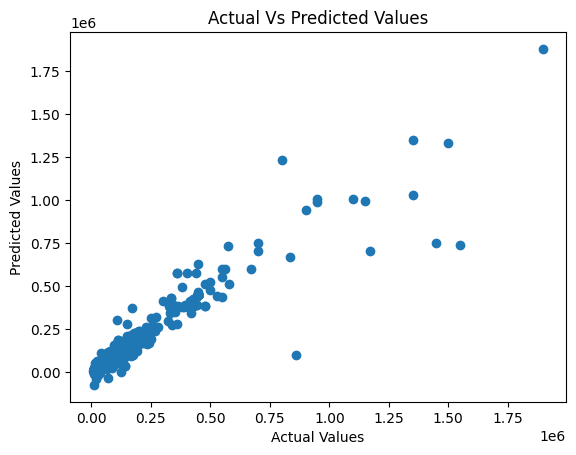

In [17]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual Vs Predicted Values')
plt.show()

In [18]:
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']

In [19]:
from sklearn.feature_selection import SelectKBest, f_regression
import joblib

In [20]:
# Feature Selection
#select the top k features
k = 10 #number of feature to select
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X,y)

In [21]:
selected_features = X.columns[selector.get_support()]
print(selected_features)

Index(['KMS_DRIVEN', 'AGE', 'POWER',
       'BIKE_NAME_Harley-Davidson Street 750 ABS', 'CITY_Jodhpur',
       'BRAND_Ducati', 'BRAND_Harley-Davidson', 'BRAND_Hero', 'BRAND_KTM',
       'BRAND_Triumph'],
      dtype='object')


In [22]:
#Split the Data
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state=42)

In [23]:
#train the model
model = LinearRegression() #intialize the model
model.fit(X_train, y_train) #Train the model

LinearRegression()

In [24]:
#evaluate the Model
d = model.predict(X_test)
mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-Squared: {r2}')

Mean Squared Error: 503428764.0755275
R-Squared: 0.942197440239708


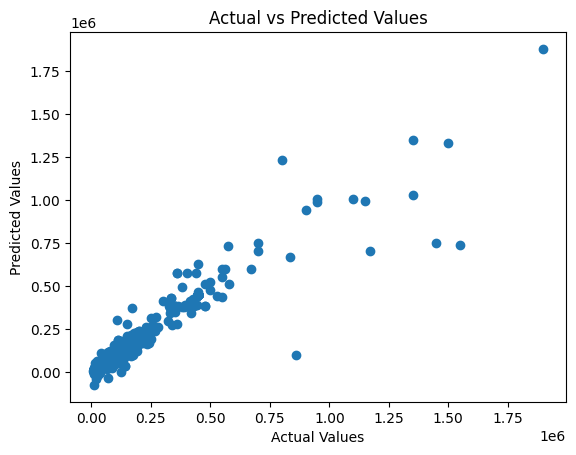

In [25]:
#visualize the Results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [26]:
#save the model
joblib.dump(model, 'model.pkl')

['model.pkl']